# Homework 4: Classification using sklearn  

The objective of this homework is to gain experience with using sklearn, a versatile Python toolbox for machine learning. The following code is copied from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py. You should be able to run the code without error messages.

make_moons
Nearest Neighbors:0.975
Linear SVM:0.875
RBF SVM:0.975
Decision Tree:0.95
Random Forest:0.95
Neural Net:0.875
AdaBoost:0.925


/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


make_circles
Nearest Neighbors:0.85
Linear SVM:0.4
RBF SVM:0.9
Decision Tree:0.775
Random Forest:0.775
Neural Net:0.775
AdaBoost:0.85


/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


linearly_separable
Nearest Neighbors:0.95
Linear SVM:0.925
RBF SVM:0.95
Decision Tree:0.95
Random Forest:0.95
Neural Net:0.95
AdaBoost:0.95


/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iris
Nearest Neighbors:0.7166666666666667
Linear SVM:0.8333333333333334
Can't output plot, wrong deminison for Z
RBF SVM:0.7833333333333333
Can't output plot, wrong deminison for Z
Decision Tree:0.7833333333333333
Random Forest:0.7666666666666667
Neural Net:0.8166666666666667
AdaBoost:0.8333333333333334


/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Can't output plot, wrong deminison for Z


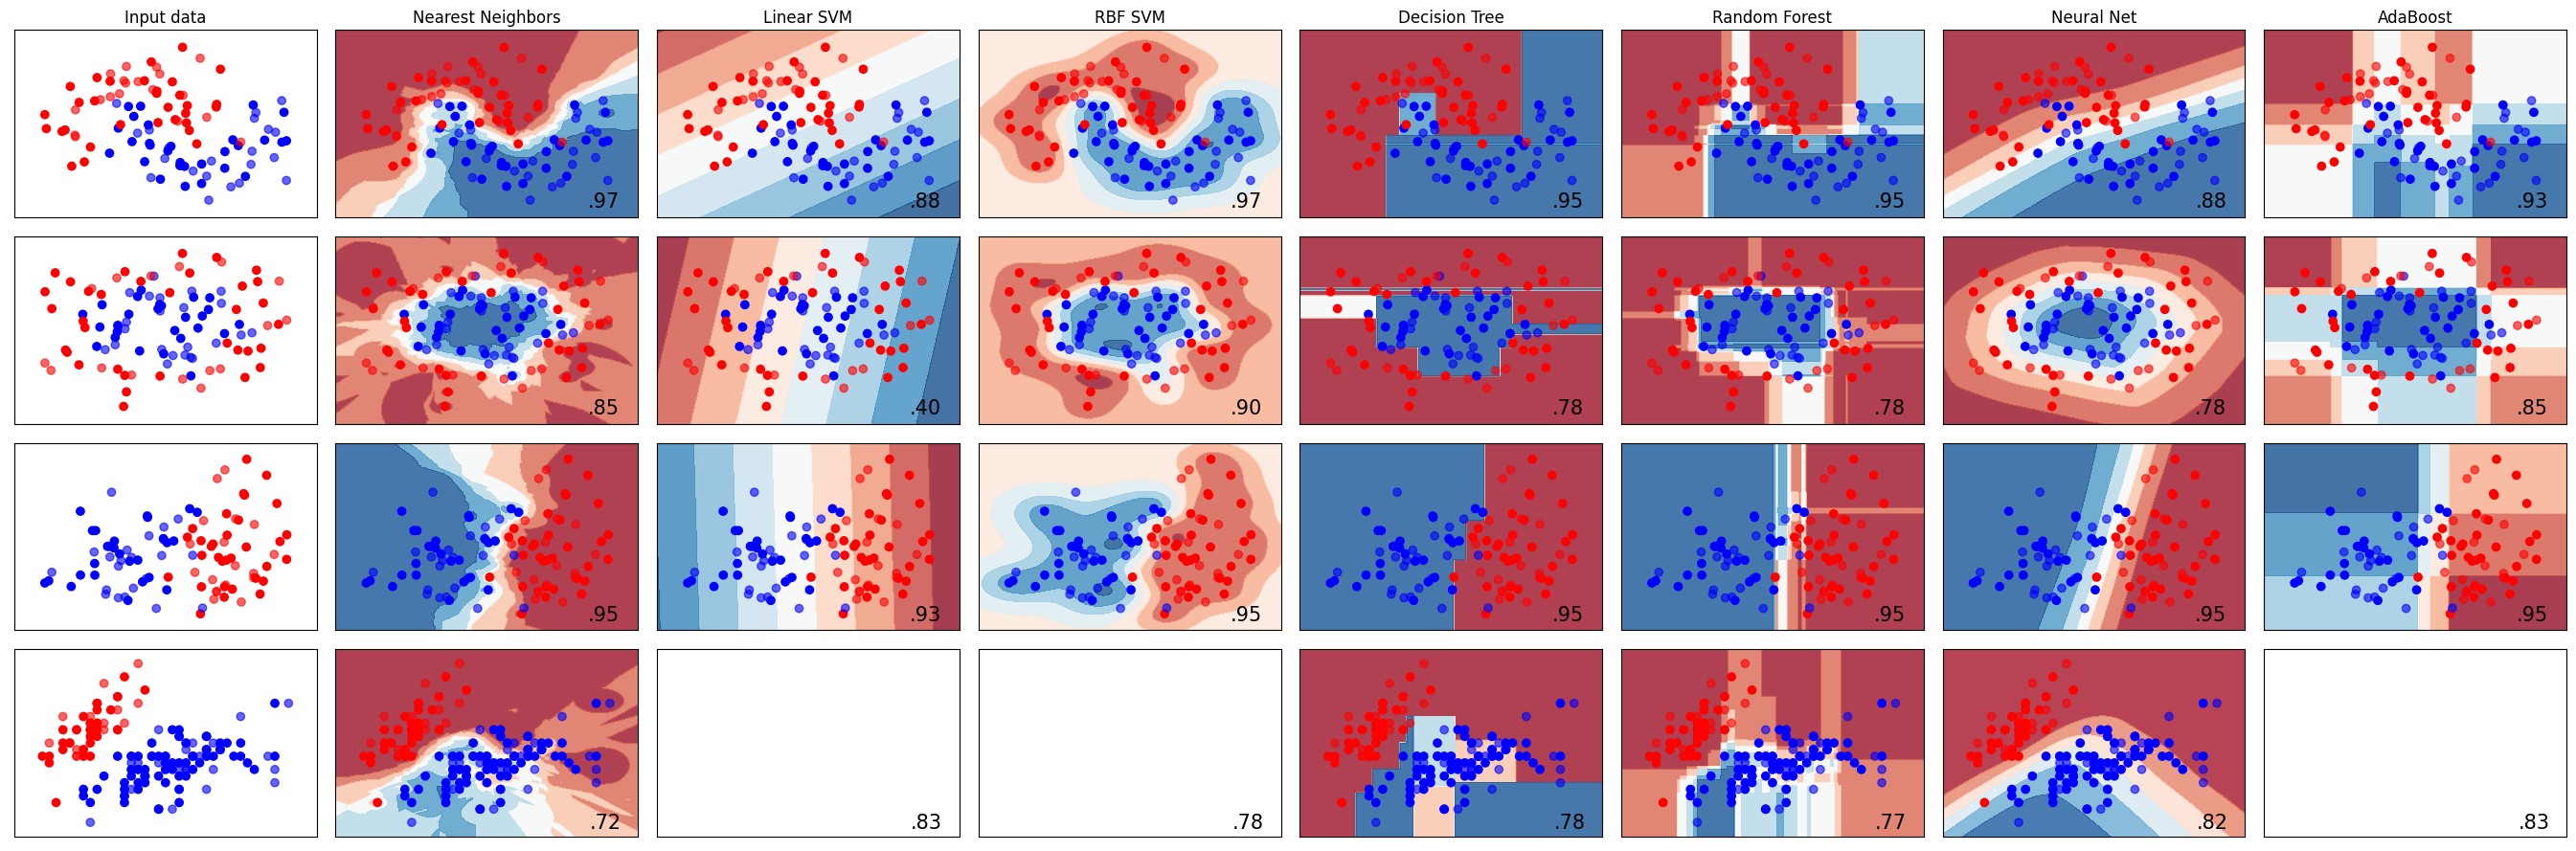

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#import iris data
from sklearn import datasets
iris = datasets.load_iris()

h = .02  # step size in the mesh

XIris = iris.data[:, [0,1]]
yIris = iris.target
irisDataset=tuple((np.asarray(XIris),yIris))

# print(irisD)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(10, weights='distance'),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=3, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(alpha=1),
    AdaBoostClassifier( learning_rate=0.8,algorithm='SAMME')]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# print(make_moons(noise=0.3, random_state=0))
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable, irisDataset
            ]

figure = plt.figure(figsize=(27, 9))
i = 1

dsNames = ['make_moons', 'make_circles', 'linearly_separable', 'Iris']
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    print('===============')
    print(dsNames[ds_cnt])
    print('===============')
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'{name}:{score}')
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        try:
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)
        except:
            print("Can't output plot, wrong deminison for Z")

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

The code above trained several types of classifiers on 3 synthetic data sets. Among them are kNN and feedforward neural networks. There are also some other algorithms we will introduce during the course. At the moment, you do not have to worry what they are and how they work. 

**Question 1**. Study the code and try to understand what each line does. In particular, pay attention to how easy it is to train predictors of different types. Run the code. You should be able to see a nice display demonstrating performance of different algorithms on 3 data sets.\
***Response:*** The code first starts splits the train and test data then starts to plot the points. Next it will train the train data and use different classifier for different methods and then plot points and color regions.

**Question 2**. Train all the listed classifiers on Iris data (you can load it using *iris = sklearn.datasets.load_iris()*) and test their accuracy. Report and discuss the results.\
***Response:*** We used the first 2 features from the iris data set. We saw the algorithms performs average around upper 80% average some goes to 70% decision tree and random forest. However, there was a error with the deminision that we can't display all the plots.

**Question 3**. Play with the hyperparameters of each of the algorithms. Try to improve the accuracy on the test data.\
***Response:*** In the KNN classifier I increased the amount of neighbors to 10 and changed the weights to 'distance' this improved the accuracy in the moon dataset. In Linear SVM, RBF SVM, Decision Tree, and MLP I did not change anything since it default values yields very good accuracy. In random forest, I added changed the feature to 2 and increased n estimator to 10 this increased the percentage from 92 to 95 for moon and linear separatable. In AdaBoost, I changed the learning rate to 0.8 and algorithm to `SAMME`, this also help make small improvements increased a couple percentage. We can conclude there is not right answer, different dataset works better for different classifiers.

**Question 4**. Perform the exploratory data analysis of  the Adult Data Set from http://archive.ics.uci.edu/ml/datasets/Adult. Train and estimate accuracy of all of all the classifiers from Question 1. Note that you will have to preprocess your data set before training. Explain all the preprocessing steps you applied and report on the accuracy on test data. Report all EDA and classification results in a 1-page document.\
***Response:***


       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

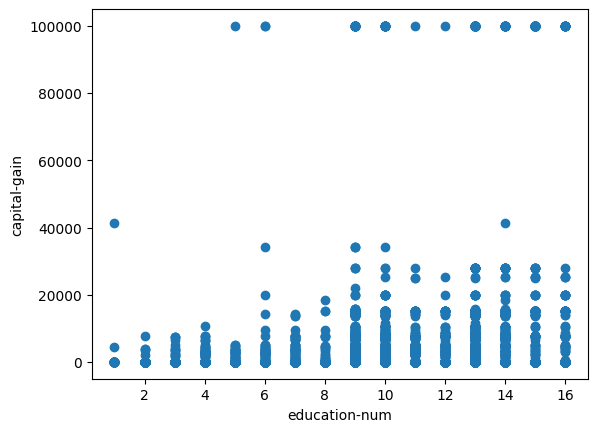

In [2]:
import pandas as pd
from copy import deepcopy
col = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
readAdult = pd.read_csv('./adult.data', names=col, header=None)
adultCopy = deepcopy(readAdult)
features = ['occupation','relationship','race','sex','native-country','workclass','education','marital-status','capital-gain','hours-per-week']

#using 1 hot encoding by reading 0 and 1
oneHotList=[]
for i in readAdult['income']:
    if ">50K" in i:
        oneHotList.append(1)
    else:
        oneHotList.append(0)
readAdult['income'] = oneHotList
# print(readAdult)

for j in range(len(features)):
    # dummies is a matrix form of ordering
    # we did this because sometimes you can categories words we use number to represent instead
    d = pd.get_dummies(readAdult[features[j]])
    readAdult = readAdult.drop(features[j], axis=1)
    readAdult = pd.concat([readAdult, d], axis=1, sort=False)
# print(readAdult)
# readAdult = readAdult.drop('income', axis = 1)
getIncome = np.asarray(readAdult['income'].tolist())
readAdult = readAdult.drop('income', axis = 1)
X = np.asarray(readAdult.values.tolist())
# print(readAdult)
datasetAdult = (X,getIncome)
# as you can see the data is separated by 0 and 1 by the feature data

print(adultCopy)
#plotted everything
# pd.plotting.scatter_matrix(adultCopy, figsize=(15, 15));
# sns.pairplot(adultCopy)

plt.xlabel("education-num")
plt.ylabel("capital-gain")
plt.scatter(adultCopy['education-num'],adultCopy['capital-gain'])

# plt.xlabel("education-num")
# plt.ylabel("capital-gain")
# adultCopy['age'].hist(figsize = (6,6))
# plt.show

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

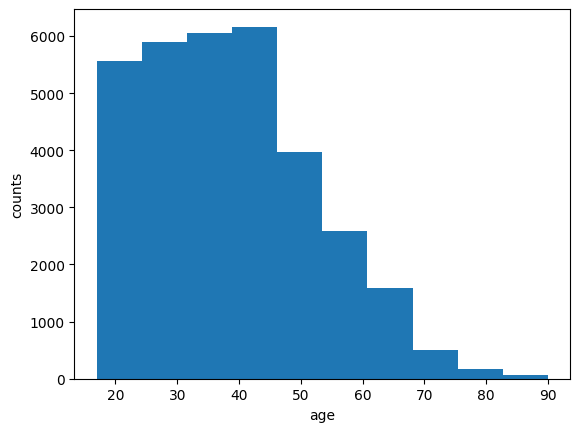

In [38]:
plt.xlabel("age")
plt.ylabel("counts")
plt.hist(adultCopy['age'])

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

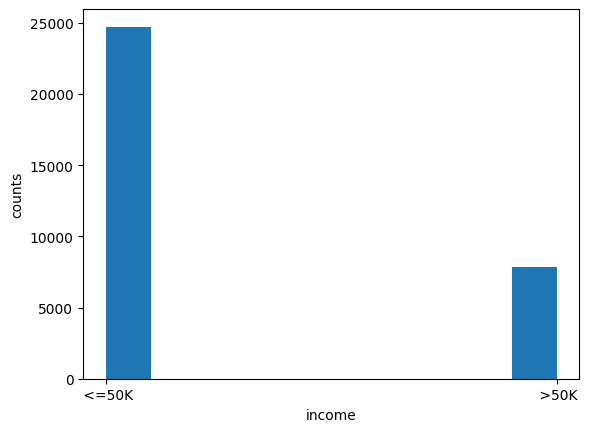

In [39]:
plt.xlabel("income")
plt.ylabel("counts")
plt.hist(adultCopy['income'])

<AxesSubplot: title={'center': 'education-num'}, xlabel='income'>

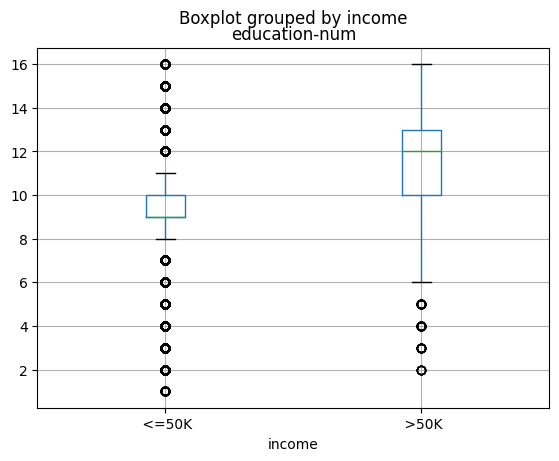

In [40]:
adultCopy.boxplot(column='education-num',by='income')

<AxesSubplot: title={'center': 'age'}, xlabel='income'>

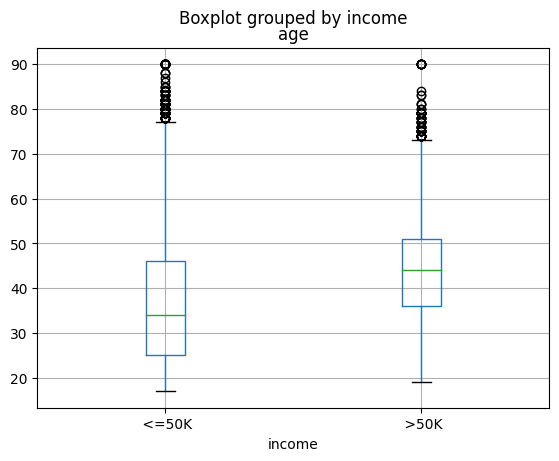

In [41]:
adultCopy.boxplot(column='age',by='income')

<AxesSubplot: title={'center': 'hours-per-week'}, xlabel='income'>

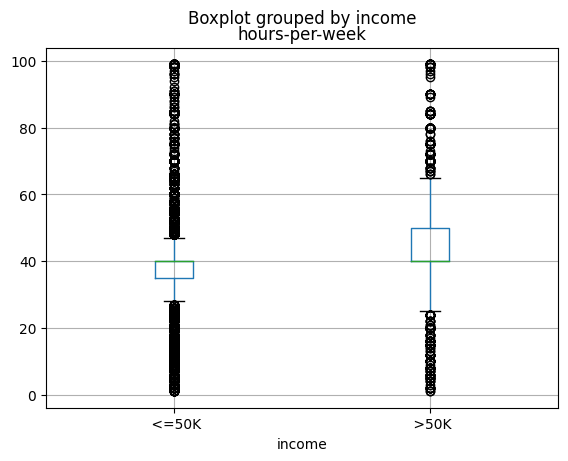

In [42]:
adultCopy.boxplot(column='hours-per-week',by='income')

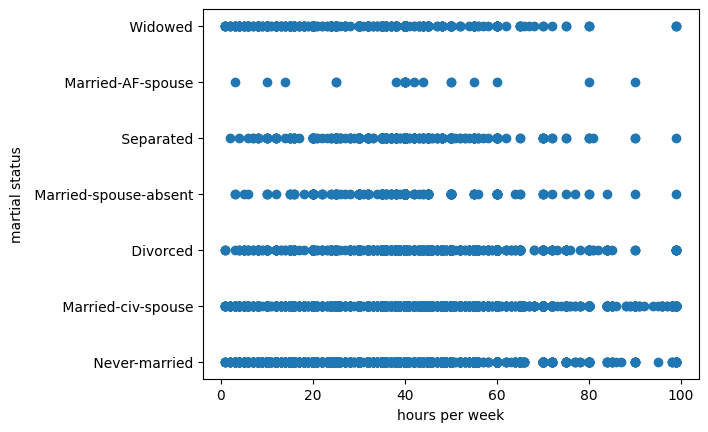

In [43]:
plt.xlabel("hours per week")
plt.ylabel("martial status")
plt.scatter(adultCopy['hours-per-week'],adultCopy['marital-status'])

make_moons
Nearest Neighbors: 0.975
Linear SVM: 0.875
RBF SVM: 0.975
Decision Tree: 0.95
Random Forest: 0.925
Neural Net: 0.9
AdaBoost: 0.925


/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


make_circles
Nearest Neighbors: 0.85
Linear SVM: 0.4
RBF SVM: 0.9
Decision Tree: 0.775
Random Forest: 0.775
Neural Net: 0.75
AdaBoost: 0.85


/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


linearly_separable
Nearest Neighbors: 0.95
Linear SVM: 0.925
RBF SVM: 0.95
Decision Tree: 0.925
Random Forest: 0.95
Neural Net: 0.95
AdaBoost: 0.95


/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iris
Nearest Neighbors: 0.7166666666666667
Linear SVM: 0.8333333333333334
Can't output plot, wrong deminison for Z
RBF SVM: 0.7833333333333333
Can't output plot, wrong deminison for Z
Decision Tree: 0.7833333333333333
Random Forest: 0.7666666666666667
Neural Net: 0.8166666666666667
AdaBoost: 0.8333333333333334


/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Can't output plot, wrong deminison for Z
Adult
Nearest Neighbors: 0.8369289827255278
Can't output plot, wrong deminison for Z
Linear SVM: 0.8602687140115163
Can't output plot, wrong deminison for Z
RBF SVM: 0.7714395393474088
Can't output plot, wrong deminison for Z
Decision Tree: 0.8382341650671785
Can't output plot, wrong deminison for Z
Random Forest: 0.7596928982725528
Can't output plot, wrong deminison for Z
Neural Net: 0.8641842610364683
Can't output plot, wrong deminison for Z
AdaBoost: 0.8352399232245682
Can't output plot, wrong deminison for Z


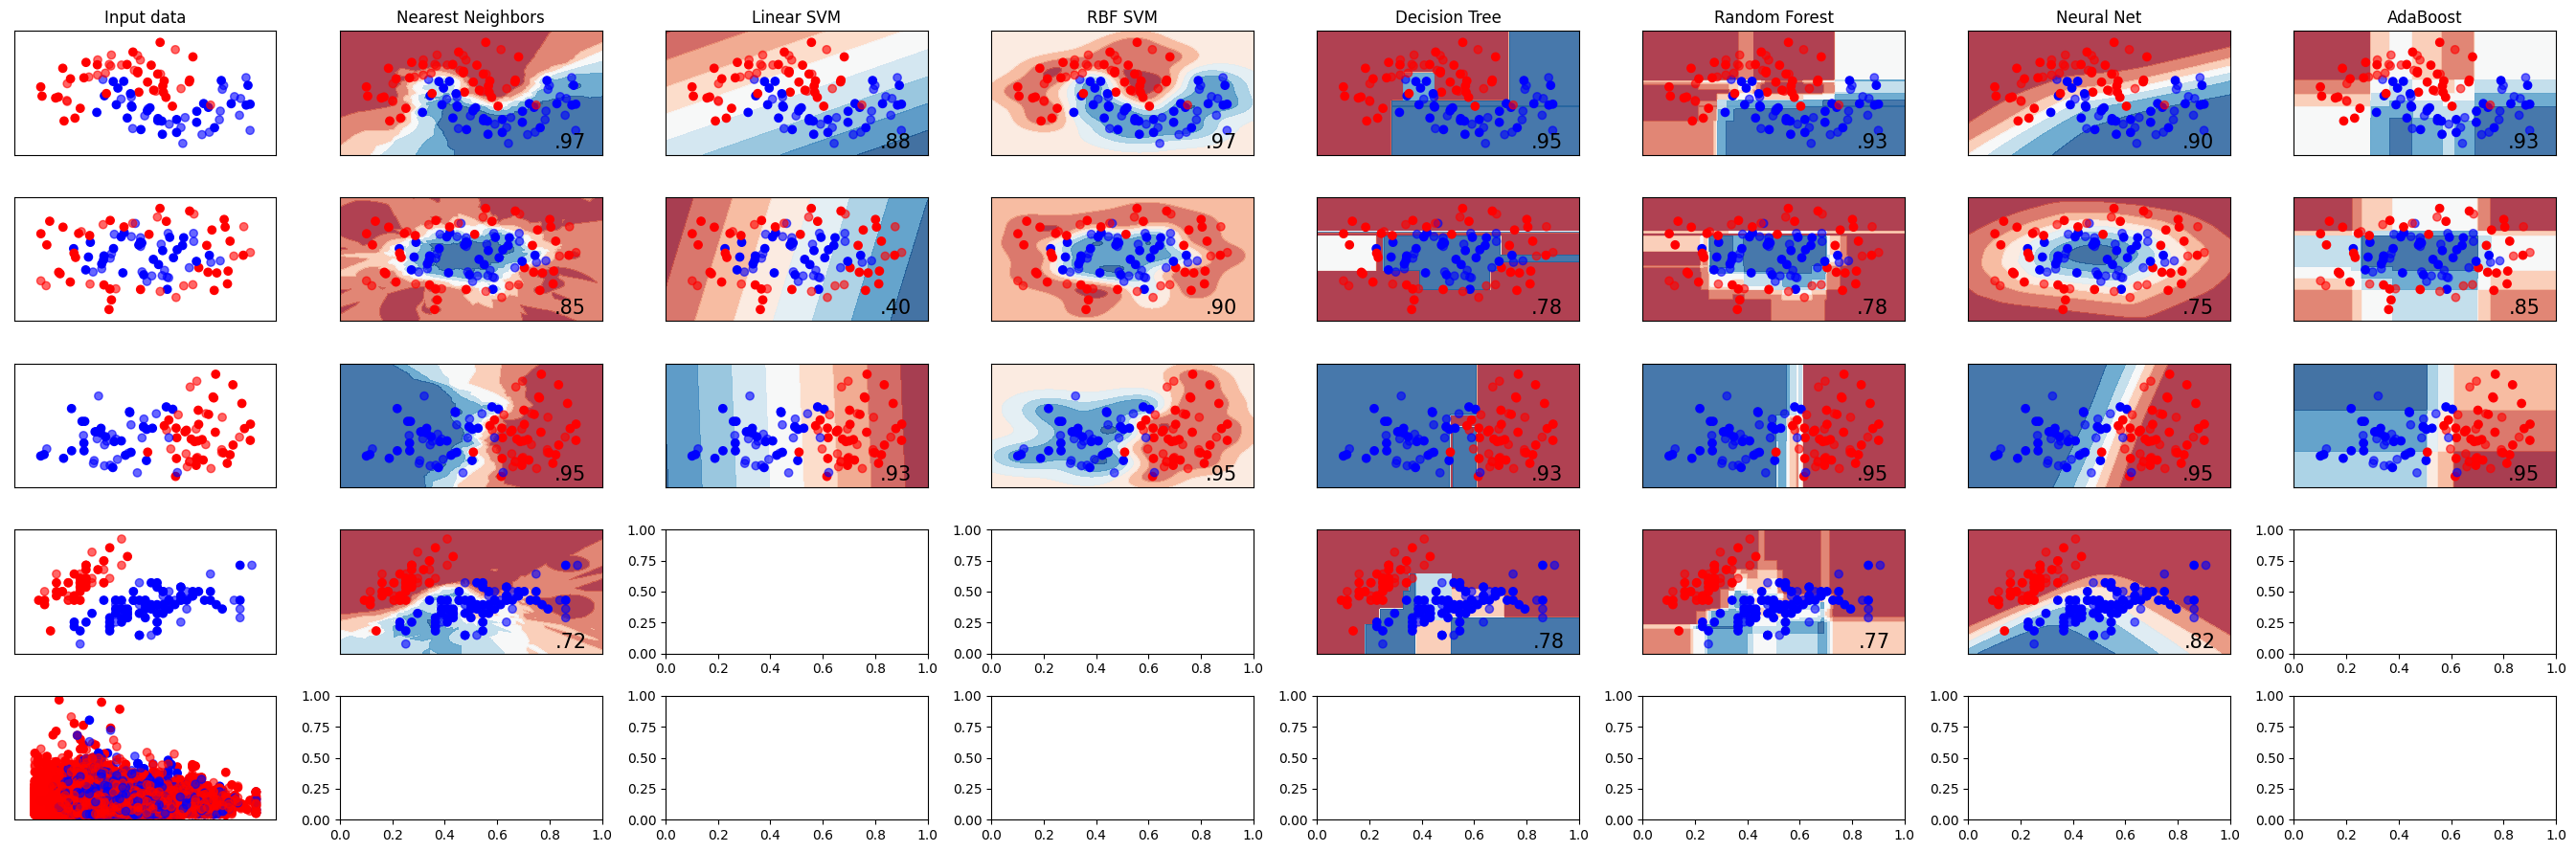

In [4]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#import iris data
from sklearn import datasets
iris = datasets.load_iris()

h = .02  # step size in the mesh

XIris = iris.data[:, [0,1]]
yIris = iris.target
irisDataset=tuple((np.asarray(XIris),yIris))

# print(irisD)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(10, weights='distance'),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=3, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(alpha=1),
    AdaBoostClassifier( learning_rate=0.8,algorithm='SAMME')]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# print(make_moons(noise=0.3, random_state=0))
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable, irisDataset, datasetAdult
            ]

figure = plt.figure(figsize=(27, 9))
i = 1

dsNames = ['make_moons', 'make_circles', 'linearly_separable', 'Iris', 'Adult']
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    print('===============')
    print(dsNames[ds_cnt])
    print('===============')
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        print(name+ ": " + str(score))
        try:
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
        except:
            print("Can't output plot, wrong deminison for Z")
        i += 1

plt.tight_layout()
plt.show()